In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

In [44]:
dataset_names = ["IJBB", "IJBC", "lfw", "ms1m"]
unc_to_dataset = {name: {} for name in ["SCF", "Power", "Power + SCF"]}
dataset_to_method_unc = {}
for dataset_name in dataset_names:
    unc_distr = np.load(
        f"/app/outputs/experiments/paper/unc_distr/{dataset_name}/open_set_identification/unc_distr.npz"
    )
    dataset_to_method_unc[dataset_name] = dict(unc_distr)

for name in unc_to_dataset:
    for dataset_name in dataset_names:
        unc_to_dataset[name][dataset_name] = dataset_to_method_unc[dataset_name][name]

In [45]:
dataset_to_method_unc[dataset_name][name]

array([-0.9829965 , -0.98159694, -0.98344465, ..., -0.9835054 ,
       -0.98189306, -0.98469689])

In [41]:
x = stats.loggamma.rvs(5, size=500) + 5
x.shape

(500,)

In [43]:
unc

(array([-3.42268149, -3.57759512, -3.4420353 , ..., -3.79764298,
        -3.72697563, -3.77400846]),
 -0.11552359810571779)

/home/erlygin/miniconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: setting an array element with a sequence.

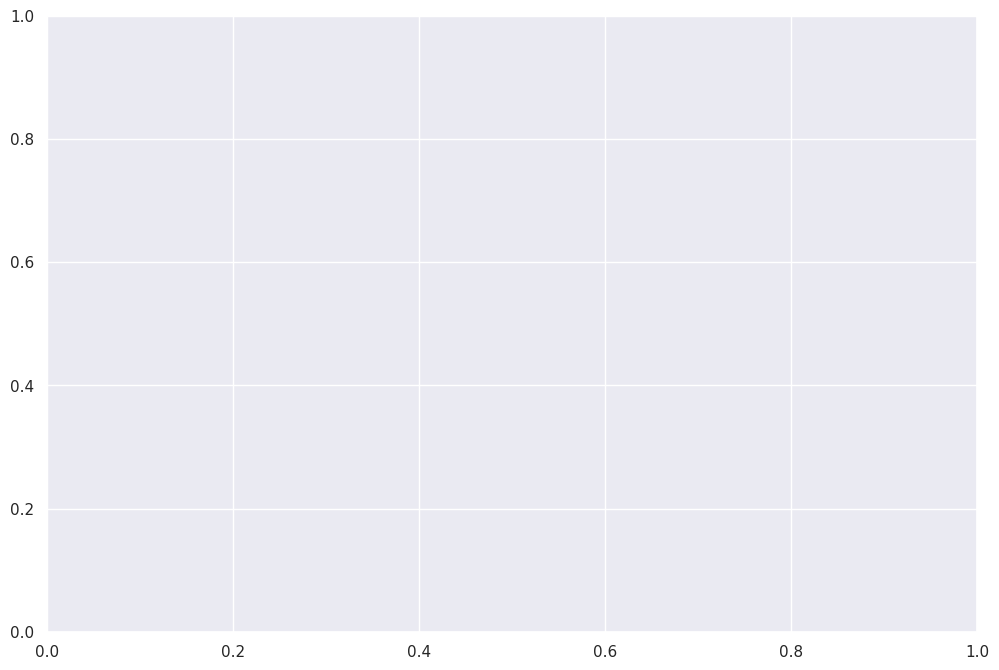

In [46]:
# make hist plots
sns.set_theme()
plt.figure(figsize=(12, 8))
bins = 100
kde = False
out_dir = Path("/app/paper_assets/images")
for method_name in unc_to_dataset:
    for dataset_name in unc_to_dataset[method_name]:
        unc = unc_to_dataset[method_name][dataset_name] + 1
        unc = stats.boxcox(unc)
        plot = sns.distplot(
            unc, kde=kde, norm_hist=True, hist=True, label=dataset_name, bins=bins
        )
    fig = plot.get_figure()
    # fig.x_label(f"Uncertainty")
    fig.legend()
    fig.tight_layout()
    fig.savefig(
        out_dir / f"{method_name}.png",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0,
    )
    plt.close(fig)

In [23]:
list(unc_distr.keys())

['SCF', 'Power', 'Power + SCF']

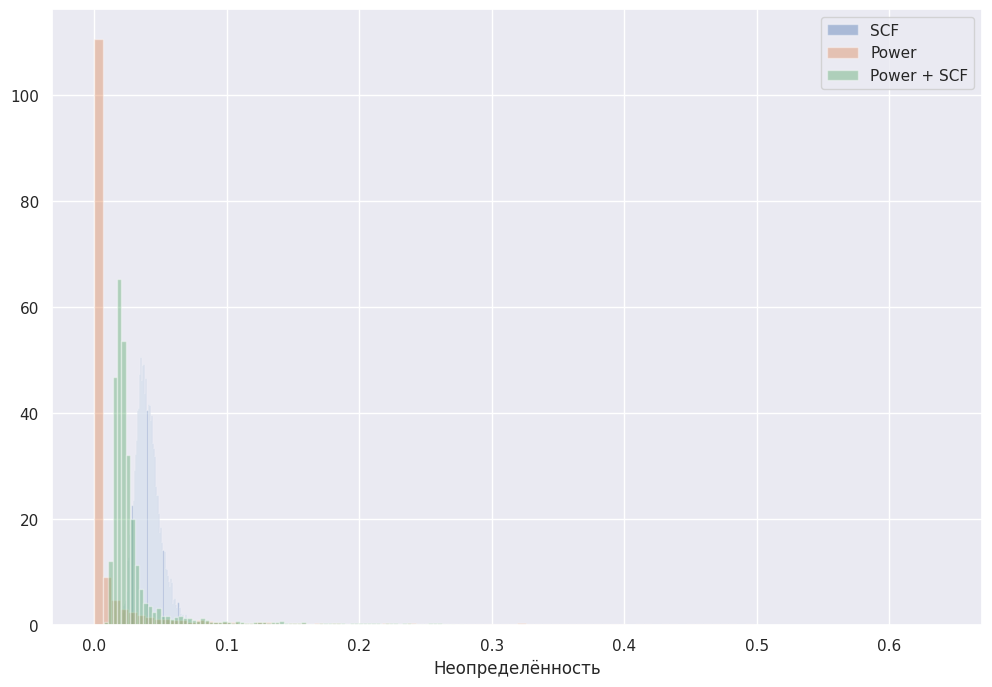

In [25]:
names = list(unc_distr.keys())
for name in names:
    sns.distplot(
        unc_distr[name] + 1, kde=kde, norm_hist=True, hist=True, label=name, bins=bins
    )
plt.xlabel(f"Неопределённость")

plt.legend()